In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [4]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


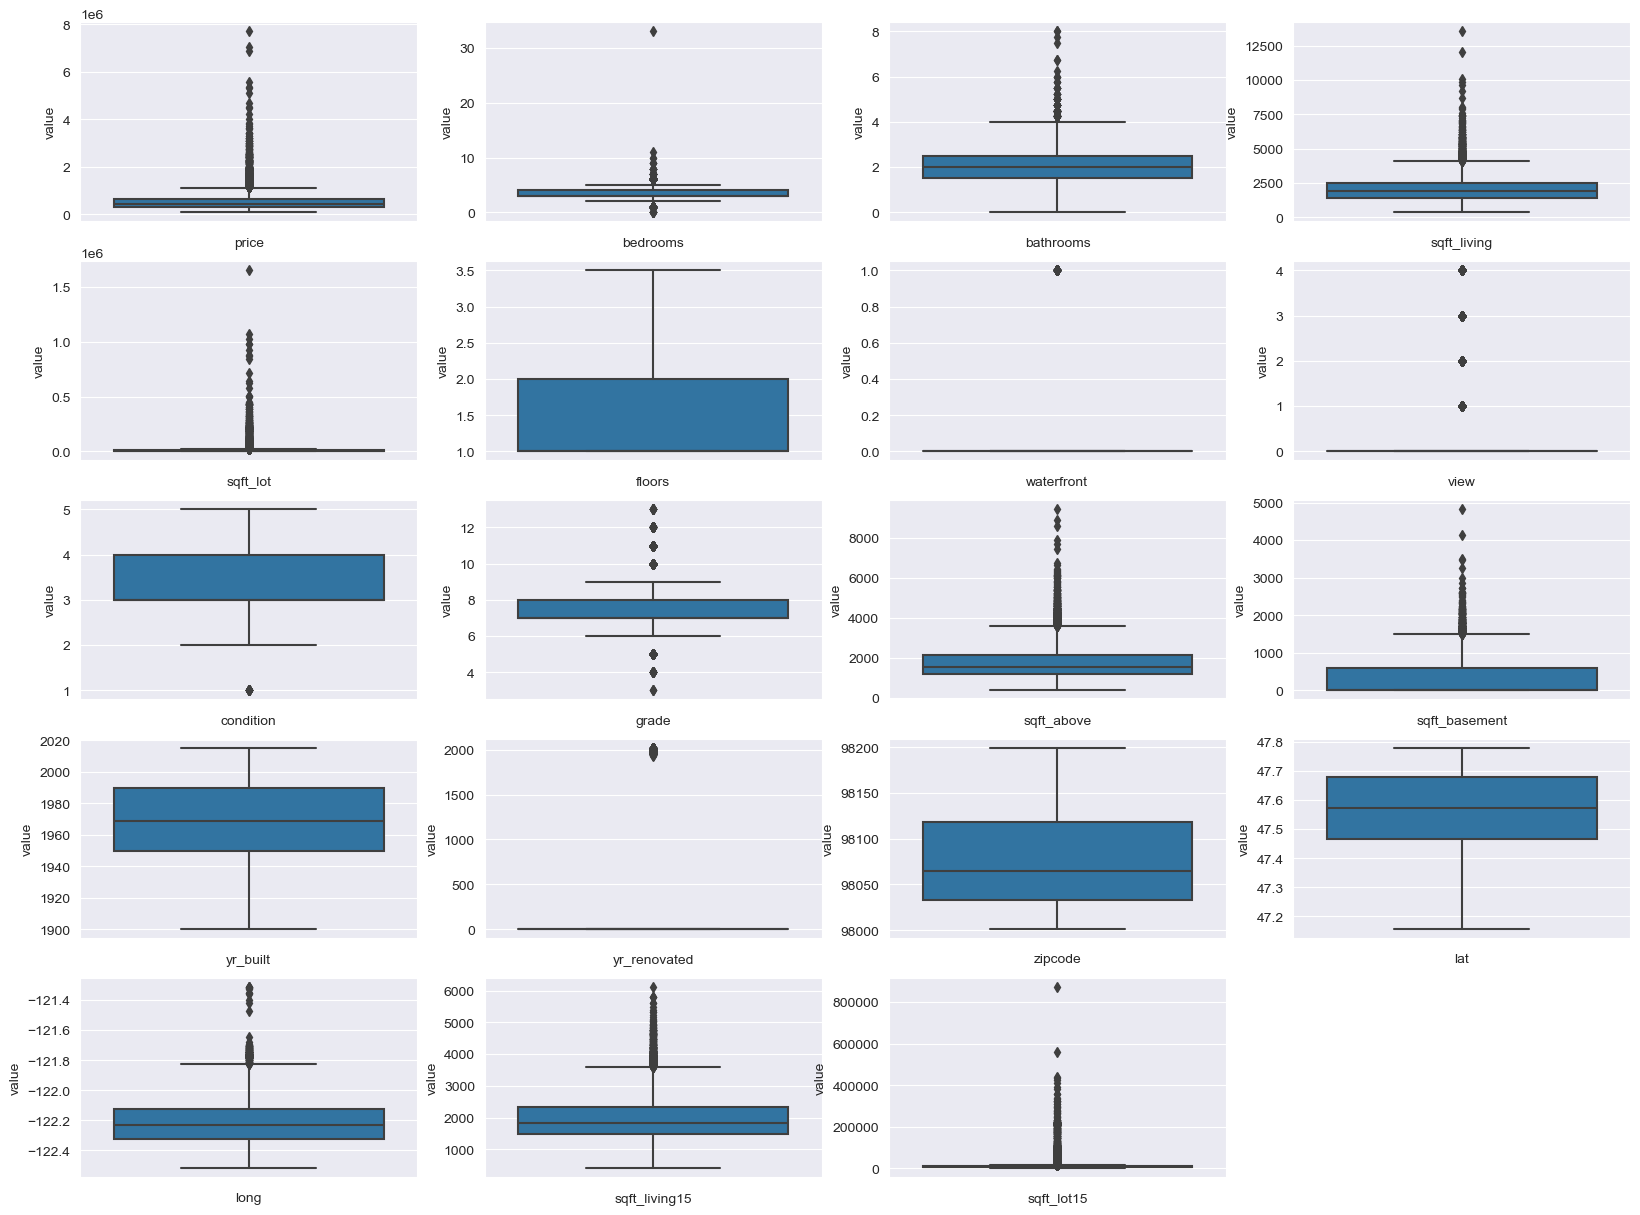

In [14]:
fig, ax = plt.subplots(5, 4, figsize=(20, 15))

for col, indx in zip(house_data, ax.flatten()):
    sns.boxplot(y=house_data[col], ax = indx).set(ylabel='value', xlabel = col)

fig.delaxes(ax = ax[4][3])

In [34]:
house_data2 = house_data2[(house_data2['view'] == 1) | (house_data2['view'] == 0)]


In [32]:
house_data2 = house_data.drop_duplicates()
house_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16610 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16610 non-null  float64
 1   bedrooms       16610 non-null  int64  
 2   bathrooms      16610 non-null  float64
 3   sqft_living    16610 non-null  int64  
 4   sqft_lot       16610 non-null  int64  
 5   floors         16610 non-null  float64
 6   waterfront     16610 non-null  int64  
 7   view           16610 non-null  int64  
 8   condition      16610 non-null  int64  
 9   grade          16610 non-null  int64  
 10  sqft_above     16610 non-null  int64  
 11  sqft_basement  16610 non-null  int64  
 12  yr_built       16610 non-null  int64  
 13  yr_renovated   16610 non-null  int64  
 14  zipcode        16610 non-null  int64  
 15  lat            16610 non-null  float64
 16  long           16610 non-null  float64
 17  sqft_living15  16610 non-null  int64  
 18  sqft_l

In [36]:
house_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15180 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15180 non-null  float64
 1   bedrooms       15180 non-null  int64  
 2   bathrooms      15180 non-null  float64
 3   sqft_living    15180 non-null  int64  
 4   sqft_lot       15180 non-null  int64  
 5   floors         15180 non-null  float64
 6   waterfront     15180 non-null  int64  
 7   view           15180 non-null  int64  
 8   condition      15180 non-null  int64  
 9   grade          15180 non-null  int64  
 10  sqft_above     15180 non-null  int64  
 11  sqft_basement  15180 non-null  int64  
 12  yr_built       15180 non-null  int64  
 13  yr_renovated   15180 non-null  int64  
 14  zipcode        15180 non-null  int64  
 15  lat            15180 non-null  float64
 16  long           15180 non-null  float64
 17  sqft_living15  15180 non-null  int64  
 18  sqft_l

In [37]:
x, y = house_data2.loc[:, house_data2.columns != 'price'], house_data2['price']

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state=42)

In [65]:
model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42, verbose=1)
model.fit(xtrain, ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

In [66]:
yPred = model.predict(xtest)
print(mean_squared_error(ytest, yPred, squared=False))
print(r2_score(ytest, yPred))

108576.94762539741
0.8690434668097955


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [61]:
params = {'n_estimators': [50, 100, 200, 300, 400], 'max_depth': [4, 6, 8, None], 'min_samples_leaf': [1, 3, 5], 'criterion': ['squared_error', 'absolute_error']}
grid = RandomizedSearchCV(model, params, scoring=custScore, cv=6, n_iter = 10, random_state=42, verbose=1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 369 out of 400 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                                   random_state=42, verbose=1),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 6, 8, None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, scoring=make_scorer(mean_squared_error),
                   verbose=1)

In [50]:
from sklearn.metrics import make_scorer
custScore = make_scorer(mean_squared_error)


In [62]:
grid.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'criterion': 'absolute_error'}

In [63]:
model = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42, min_samples_leaf=5, max_depth=4, verbose=1)
model.fit(xtrain, ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


RandomForestRegressor(max_depth=4, min_samples_leaf=5, n_estimators=300,
                      n_jobs=-1, random_state=42, verbose=1)

In [64]:
yPred = model.predict(xtest)
print(mean_squared_error(ytest, yPred, squared=False))
print(r2_score(ytest, yPred))

160099.23716464665
0.7152718292509067


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.0s finished


In [67]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [69]:
yPred = model.predict(eval_data)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [70]:
eval_data['price'] = yPred

In [73]:
eval_data.to_csv('C:\\Users\\edwin\\Documents\\Code\\export_dataframe.csv')

In [74]:
df = pd.DataFrame(yPred, columns=['Prediction'])

In [81]:
df.to_csv('C:\\Users\\edwin\\Documents\\Code\\export_dataframe2.csv')

In [79]:
df.head()

,Prediction
0,1499337.250
1,670536.015
2,504879.875
3,444746.635
4,417945.250


In [77]:
df = df.reset_index(drop=True)

',Prediction\r\n0,1499337.25\r\n1,670536.015\r\n2,504879.875\r\n3,444746.635\r\n4,417945.25\r\n5,285796.31\r\n6,222548.33333333337\r\n7,408943.985\r\n8,877157.655\r\n9,341729.115\r\n10,619055.69\r\n11,933453.435\r\n12,938597.4166666667\r\n13,944076.9666666666\r\n14,177016.625\r\n15,688994.895\r\n16,491706.7\r\n17,342379.875\r\n18,866031.62\r\n19,226581.26\r\n20,247709.9\r\n21,582758.9\r\n22,505840.775\r\n23,238535.0\r\n24,329161.94\r\n25,591451.5\r\n26,388335.15\r\n27,284257.0625\r\n28,735947.48\r\n29,332831.23\r\n30,418914.72\r\n31,367927.81\r\n32,486437.5\r\n33,316119.625\r\n34,553607.3\r\n35,819347.32\r\n36,397436.2\r\n37,304480.005\r\n38,364298.855\r\n39,264102.915\r\n40,350855.8\r\n41,591328.255\r\n42,286889.635\r\n43,541230.925\r\n44,564730.4\r\n45,508256.95\r\n46,1155512.0833333335\r\n47,242346.05\r\n48,388141.1\r\n49,471862.835\r\n50,393082.715\r\n51,460981.89\r\n52,780193.3583333334\r\n53,232116.19166666668\r\n54,840685.48\r\n55,502463.0\r\n56,768584.1733333333\r\n57,391251.71